# Thermal Comfort Analysis & Prediction Model
BPS5229 Individual Assignment
by Liu Renhao (A0111048W)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Introduction

The generally accepted definition of thermal comfort according to ASHRAE is "the condition of the mind that expresses satisfaction with the thermal environment".

Thermal comfort is commonly attributed to the following 6 factors:


However, these factors can be subjective and may not always give accurate results. 

The first part of this study will be to analyze the impact of variables affecitng thermal comfort using the dataset from ASHRAE Global Thermal Comfort Database II.

The second part of this study will be to determine which factors can help to create a better model for predicting thermal comfort. 


# Part 1 - Exploratory Analysis of ASHRAE Global Thermal Comfort Database II

**Loading of data from ASHRAE Global Thermal Comfort Database II:**

In [2]:
raw_data = pd.read_csv(r"C:\Users\polep\OneDrive - Högskolan Dalarna\Desktop\Interview\portfolio_projects\Thermal\ashrae_db2.01.csv")
raw_data

C:\Users\polep\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10,11,13,18,19,34,50) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Publication (Citation),Data contributor,Year,Season,Koppen climate classification,Climate,City,Country,Building type,Cooling startegy_building level,...,Subject«s height (cm),Subject«s weight (kg),Blind (curtain),Fan,Window,Door,Heater,Outdoor monthly air temperature (C),Outdoor monthly air temperature (F),Database
0,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,162.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
1,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,154.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
2,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,173.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
3,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,167.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
4,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,178.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107578,"Kwok, A.G. ""Thermal Comfort in Tropical Classr...",Alison Kwok,1996.0,Winter,As,Tropical dry savanna,Honolulu,USA,Classroom,Air Conditioned,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Database 1
107579,"Kwok, A.G. ""Thermal Comfort in Tropical Classr...",Alison Kwok,1996.0,Winter,As,Tropical dry savanna,Honolulu,USA,Classroom,Air Conditioned,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Database 1
107580,"Kwok, A.G. ""Thermal Comfort in Tropical Classr...",Alison Kwok,1996.0,Winter,As,Tropical dry savanna,Honolulu,USA,Classroom,Air Conditioned,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Database 1
107581,"Kwok, A.G. ""Thermal Comfort in Tropical Classr...",Alison Kwok,1996.0,Winter,As,Tropical dry savanna,Honolulu,USA,Classroom,Air Conditioned,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Database 1


**A summary on the type of information included in this dataset:**

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107583 entries, 0 to 107582
Data columns (total 70 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Publication (Citation)                            105928 non-null  object 
 1   Data contributor                                  107583 non-null  object 
 2   Year                                              107335 non-null  float64
 3   Season                                            107342 non-null  object 
 4   Koppen climate classification                     107583 non-null  object 
 5   Climate                                           107583 non-null  object 
 6   City                                              107570 non-null  object 
 7   Country                                           107583 non-null  object 
 8   Building type                                     103384 non-null  object 
 9   Cool

For this study, we shall extact the following 10 feature variables which could have an impact on thermal comfort (target variable):

1) Season

2) Koppen climate classification

3) Building type

4) Cooling strategy building level

5) Clo *

6) Met *

7) Air temperature (C) * 

8) Relative humidity (%) *

9) Air velocity (m/s) *

10) Outdoor monthly air temperature

(Factors with * are variables which are commonly found and attributed to thermal comfort models. The sixth variable, radiant temperature (C), was excluded from this study due to missing data which will affect the available size of dataset)

In [4]:
data = raw_data[['Season', 'Koppen climate classification', 'Building type', 'Cooling startegy_building level',
                 'Clo', 'Met', 'Air temperature (C)', 'Relative humidity (%)','Air velocity (m/s)', 
                 'Outdoor monthly air temperature (C)', 'Thermal comfort']]
data

,Season,Koppen climate classification,Building type,Cooling startegy_building level,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),Outdoor monthly air temperature (C),Thermal comfort
0,Summer,Cfa,Classroom,Air Conditioned,0.25,NaN,24.2,50.2,0.06,25.0,5.0
1,Summer,Cfa,Classroom,Air Conditioned,0.25,NaN,24.2,50.2,0.06,25.0,5.0
2,Summer,Cfa,Classroom,Air Conditioned,0.27,NaN,24.2,50.2,0.06,25.0,6.0
3,Summer,Cfa,Classroom,Air Conditioned,0.23,NaN,24.2,50.2,0.06,25.0,4.0
4,Summer,Cfa,Classroom,Air Conditioned,0.34,NaN,24.2,50.2,0.06,25.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
107578,Winter,As,Classroom,Air Conditioned,0.59,1.2,NaN,67.4,NaN,NaN,5
107579,Winter,As,Classroom,Air Conditioned,0.44,1.2,NaN,67.4,NaN,NaN,5
107580,Winter,As,Classroom,Air Conditioned,0.37,1.2,NaN,67.4,NaN,NaN,5
107581,Winter,As,Classroom,Air Conditioned,0.80,1.2,NaN,67.4,NaN,NaN,4


# Dealing with missing data

Checking for missing data in extracted dataset:

In [5]:
data.isnull().sum()

Season                                   241
Koppen climate classification              0
Building type                           4199
Cooling startegy_building level         1227
Clo                                     7920
Met                                    17164
Air temperature (C)                     7672
Relative humidity (%)                   9821
Air velocity (m/s)                     17691
Outdoor monthly air temperature (C)    28245
Thermal comfort                        71248
dtype: int64

For simplicity, rows with missing data were removed from the dataset:

In [6]:
data = data.dropna()
data

,Season,Koppen climate classification,Building type,Cooling startegy_building level,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),Outdoor monthly air temperature (C),Thermal comfort
74,Summer,Cfa,Office,Air Conditioned,0.57,1.0,24.3,36.8,0.27,32.8,4.5
75,Summer,Cfa,Office,Air Conditioned,0.57,1.1,25.7,33.1,0.09,32.8,5.2
76,Summer,Cfa,Office,Air Conditioned,0.57,1.1,24.6,34.9,0.06,32.8,2.5
77,Summer,Cfa,Office,Air Conditioned,0.57,1.0,26.4,31.7,0.13,32.8,2.7
78,Summer,Cfa,Office,Air Conditioned,0.57,1.0,25.0,33.3,0.07,32.8,2.2
...,...,...,...,...,...,...,...,...,...,...,...
81746,Winter,Cfa,Senior center,Mixed Mode,0.94,1.0,22.4,52.5,0.06,13.7,5.0
81747,Winter,Cfa,Senior center,Mixed Mode,0.66,1.0,22.1,54.1,0.08,13.7,5.0
81748,Winter,Cfa,Senior center,Mixed Mode,0.69,1.0,22.0,54.0,0.08,13.7,5.0
81749,Winter,Cfa,Senior center,Mixed Mode,0.82,1.0,20.7,58.0,0.11,13.7,5.0


In [7]:
data.isnull().sum()

Season                                 0
Koppen climate classification          0
Building type                          0
Cooling startegy_building level        0
Clo                                    0
Met                                    0
Air temperature (C)                    0
Relative humidity (%)                  0
Air velocity (m/s)                     0
Outdoor monthly air temperature (C)    0
Thermal comfort                        0
dtype: int64

No more missing data!

Checking data type of columns:

In [8]:
data.dtypes

Season                                  object
Koppen climate classification           object
Building type                           object
Cooling startegy_building level         object
Clo                                    float64
Met                                    float64
Air temperature (C)                    float64
Relative humidity (%)                  float64
Air velocity (m/s)                     float64
Outdoor monthly air temperature (C)    float64
Thermal comfort                         object
dtype: object

#Converting 'object' data type to 'category':

In [9]:
#data = pd.concat([data.select_dtypes([], ['object']),data.select_dtypes(['object']).apply(pd.Series.astype, dtype='category')], axis=1)
#data.dtypes

A closer look at 'Thermal comfort' the target variable we are interested in for this study:

In [10]:
data['Thermal comfort'].value_counts()

5.0    6081
6.0    3393
2.0    2363
4.0    1864
3.0    1679
1.0     288
4.5     267
5       149
4        38
1.5      25
6        23
3        13
2         7
3.5       7
2.5       3
1         2
4.3       1
1.3       1
2.2       1
2.8       1
2.7       1
2.3       1
5.2       1
Na        1
Name: Thermal comfort, dtype: int64

In [11]:
data = data[data['Thermal comfort'] != 'Na']

data['Thermal comfort'] = data['Thermal comfort'].astype('int64')
data['Thermal comfort'].value_counts(sort=False)
#data['Thermal comfort'].value_counts()

<ipython-input-11-91e73e9cb135>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Thermal comfort'] = data['Thermal comfort'].astype('int64')


1     316
2    2377
3    1699
4    2170
5    6231
6    3416
Name: Thermal comfort, dtype: int64

<AxesSubplot:>

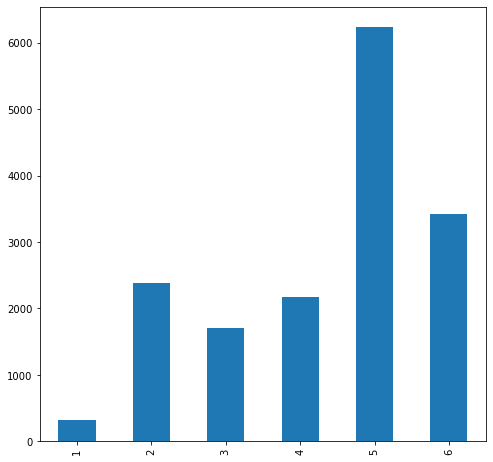

In [12]:
data['Thermal comfort'].value_counts(sort=False).plot(kind='bar', figsize=(8,8))

**Observation: Most data points for thermal comfort are within comfortable and very comfotable range (i.e. 5 & 6).**

In [13]:
data.describe()

,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),Outdoor monthly air temperature (C),Thermal comfort
count,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,0.681518,1.195620,25.388728,50.913968,0.261687,24.768153,4.349312
std,0.324204,0.197861,4.439810,15.763509,0.693904,8.259837,1.404411
min,0.000000,0.700000,0.600000,10.300000,0.000000,-2.000000,1.000000
25%,0.490000,1.100000,22.800000,39.400000,0.060000,21.300000,3.000000
50%,0.630000,1.200000,25.300000,50.100000,0.150000,26.000000,5.000000
75%,0.780000,1.200000,28.100000,63.300000,0.330000,30.800000,5.000000
max,2.870000,5.000000,45.200000,95.300000,56.170000,45.100000,6.000000


<AxesSubplot:>

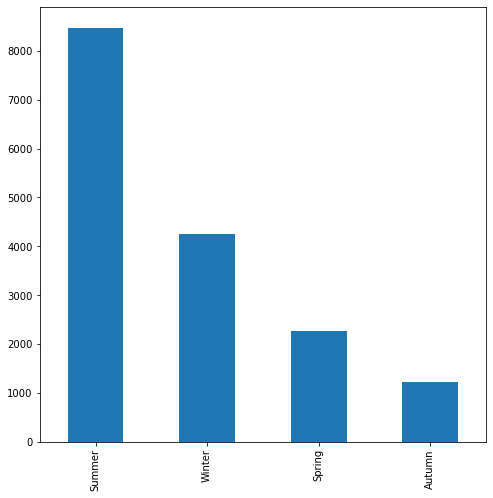

In [14]:
data['Season'].value_counts().plot(kind='bar', figsize=(8,8))

**Observation: Most data points are in summer, followed by winter then spring. Least data points available in autuum.**

<AxesSubplot:>

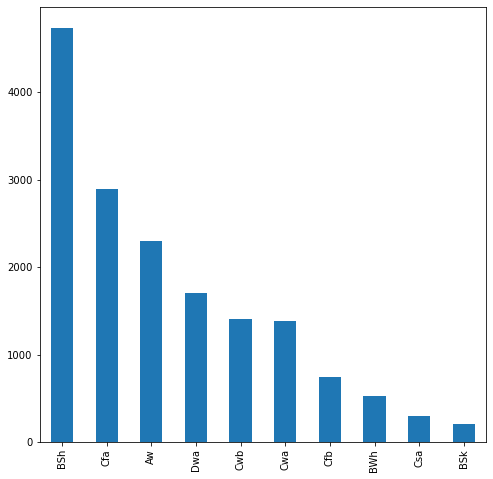

In [15]:
data['Koppen climate classification'].value_counts().plot(kind='bar', figsize=(8,8))

**Observation: The three most common climate type included in this dataset are 1) hot semi-arid, 2) humid subtropical, 3) tropical wet savanna.**

<AxesSubplot:>

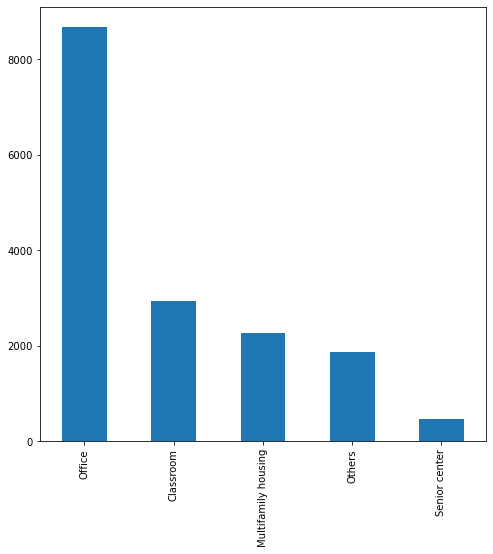

In [16]:
data['Building type'].value_counts().plot(kind='bar', figsize=(8,8))

**Observation: Most common data points are for office building type.**

<AxesSubplot:>

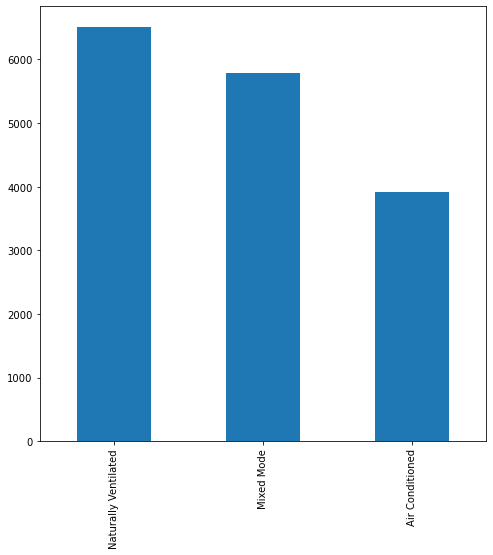

In [17]:
data['Cooling startegy_building level'].value_counts().plot(kind='bar', figsize=(8,8))

**Observation: Building cooling strategy is relatively evenly distributed across the 3 types.**

# 1) Thermal comfort VS Air temperature (C):

<AxesSubplot:xlabel='Thermal comfort', ylabel='Air temperature (C)'>

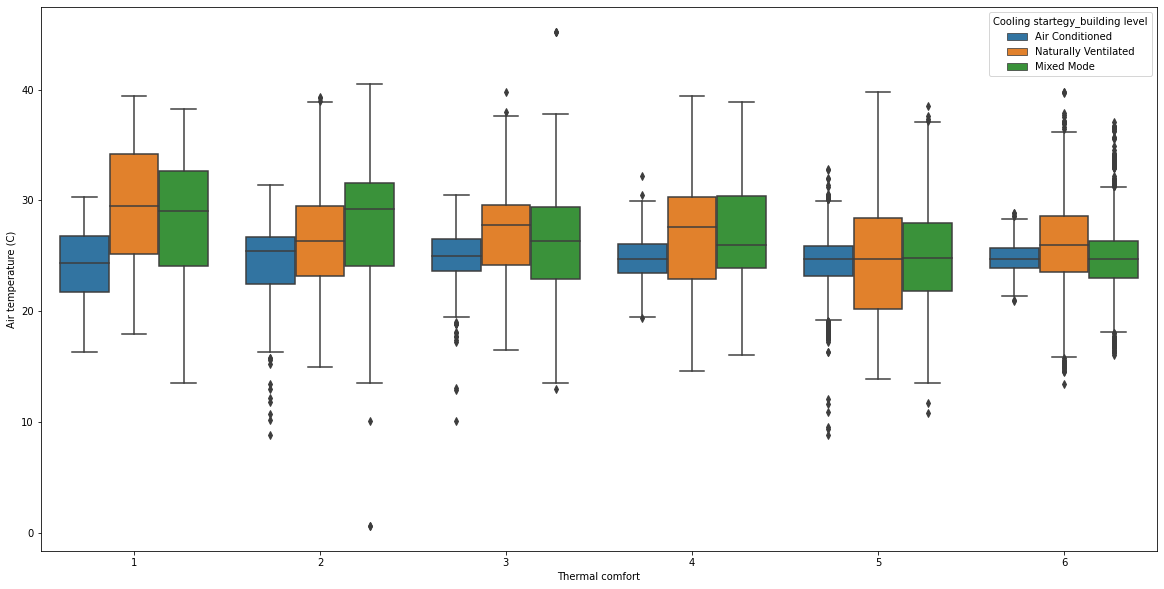

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.boxplot(x = 'Thermal comfort', y = 'Air temperature (C)', hue = 'Cooling startegy_building level', data = data)

**Observations: In general, the lower the air temperature, the higher the thermal comfort.**

# 2) Thermal comfort VS Relative humidity (%)

<AxesSubplot:xlabel='Thermal comfort', ylabel='Relative humidity (%)'>

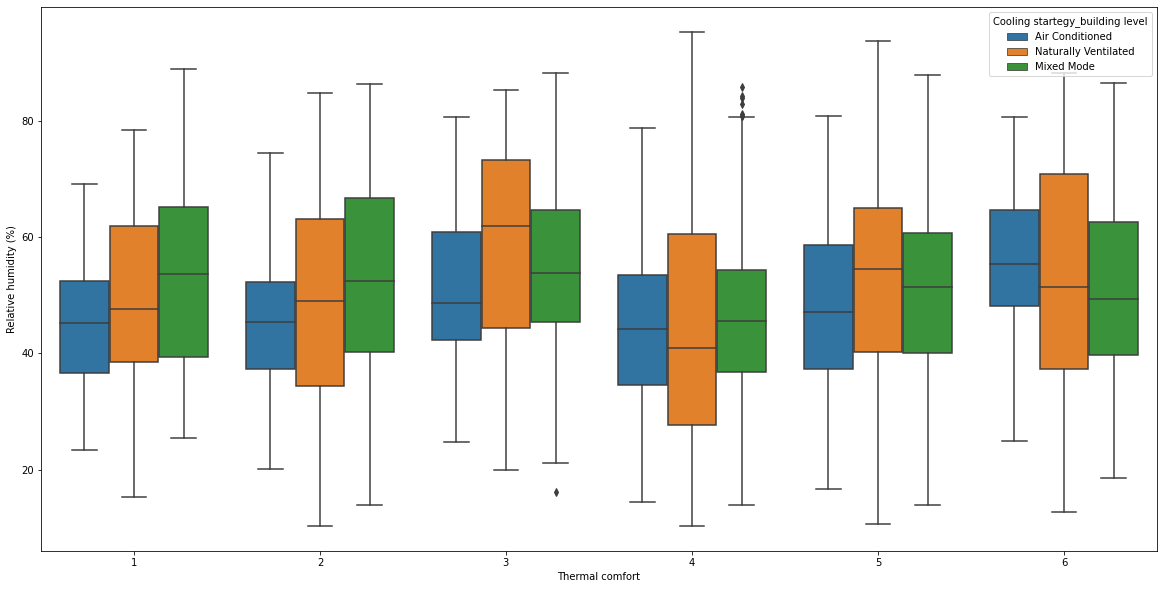

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.boxplot(x = 'Thermal comfort', y = 'Relative humidity (%)', hue = 'Cooling startegy_building level', data = data)

**Observations: Difficult to determine if relative humidity on its own has significant impact on thermal comfort.**


# 3) Thermal comfort VS Air velocity (m/s)

Air velocities greater than 1.0 m/s were removed as outliers in order to obtain a more accurate/representative dataset:


<AxesSubplot:xlabel='Thermal comfort', ylabel='Air velocity (m/s)'>

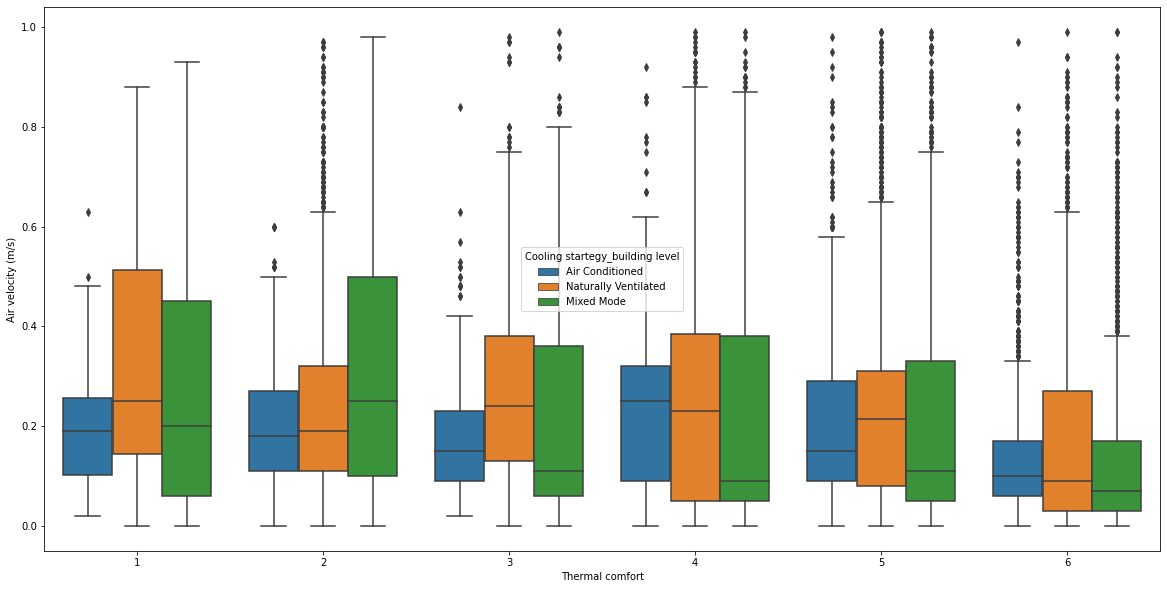

In [20]:
data = data[data['Air velocity (m/s)'] < 1.0]

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.boxplot(x = 'Thermal comfort', y = 'Air velocity (m/s)', hue = 'Cooling startegy_building level', data = data)

**Observations: The lower the air velocity, the better the thermal comfort.**


# 4) Thermal comfort VS Clothing insulation

Rounding of clothing insulation to 1 significant figure:

In [21]:
data['Clo'] = data['Clo'].round(1)
data['Clo'].value_counts()

0.6    3322
0.7    2780
0.5    2211
0.4    1599
0.8    1416
0.3     945
0.9     685
1.0     662
1.1     338
0.2     338
1.2     293
1.4     193
1.3     176
1.5     139
1.6     129
1.8     125
1.7      98
0.1      81
1.9      52
2.0      37
2.1      21
2.2      12
2.3      11
0.0       9
2.6       5
2.4       5
2.5       4
2.7       3
2.8       2
2.9       1
Name: Clo, dtype: int64

<AxesSubplot:xlabel='Thermal comfort', ylabel='Clo'>

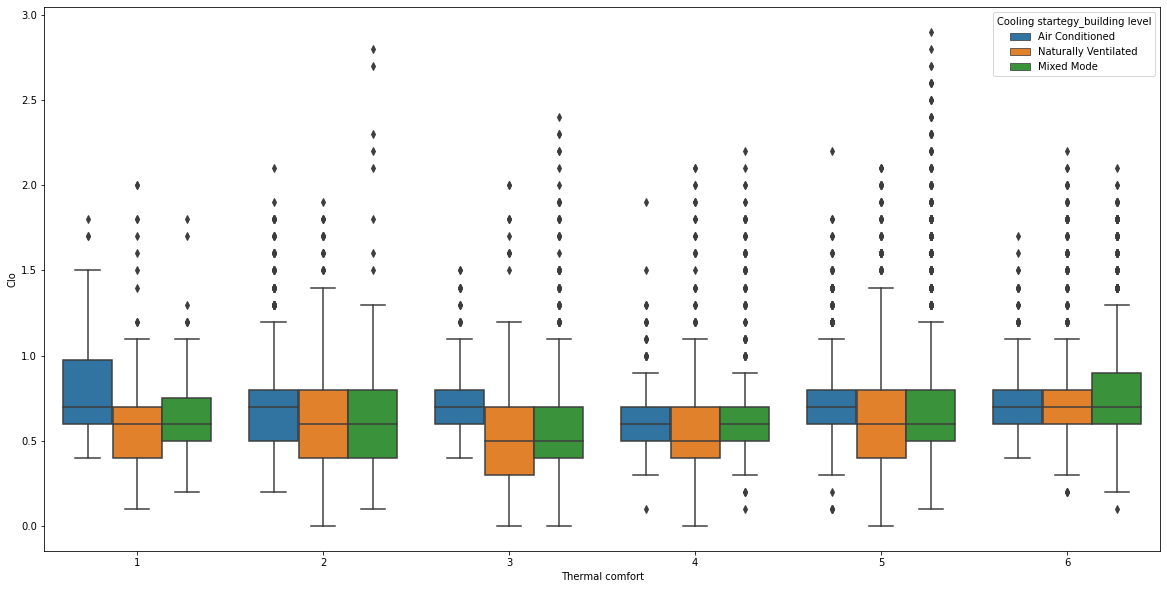

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.boxplot(x = 'Thermal comfort', y = 'Clo', hue = 'Cooling startegy_building level', data = data)

Checking distribution of clothing insulation in dataset:

C:\Users\polep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Clo', ylabel='Density'>

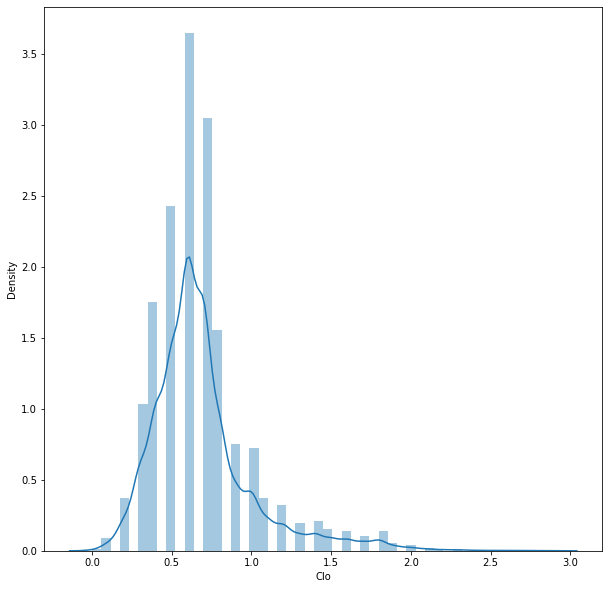

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.distplot(data['Clo'])

# 5) Thermal comfort VS Metabolic rate

Metabolic rates greater than 3.0 were removed as outliers in order to obtain a more accurate/representative dataset:

<AxesSubplot:xlabel='Thermal comfort', ylabel='Met'>

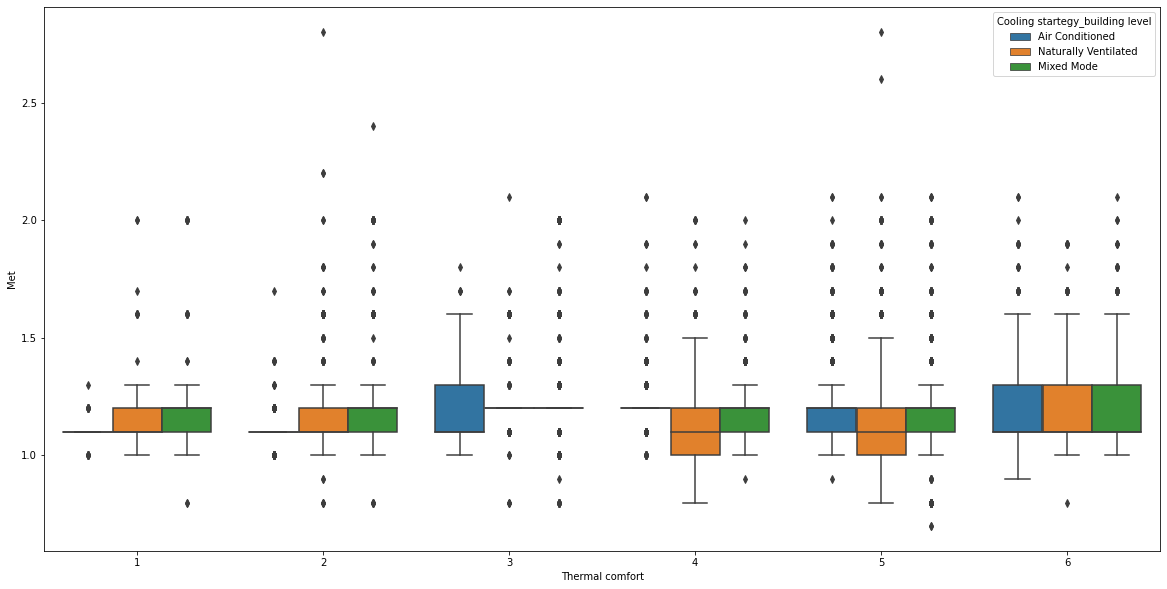

In [24]:
data = data[data['Met'] < 3.0]

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.boxplot(x = 'Thermal comfort', y = 'Met', hue = 'Cooling startegy_building level', data = data)

Checking distribution of metabolic rate in dataset:

C:\Users\polep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Met', ylabel='Density'>

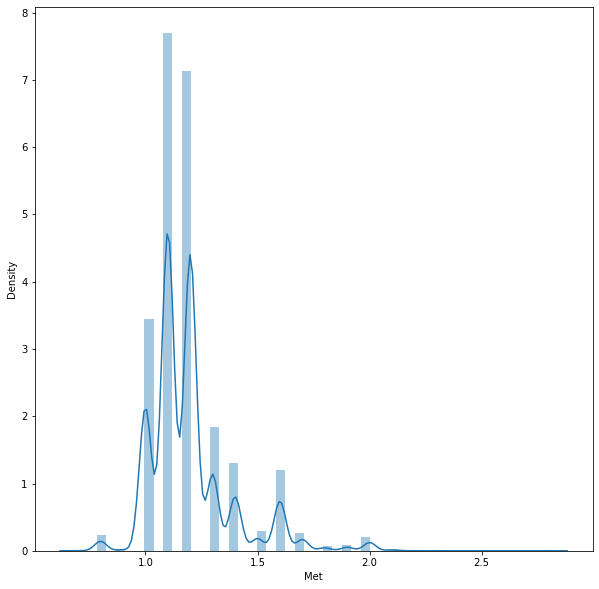

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.distplot(data['Met'])

Final dataset to be used for creating a prediction model for thermal comfort:

In [26]:
data

,Season,Koppen climate classification,Building type,Cooling startegy_building level,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),Outdoor monthly air temperature (C),Thermal comfort
74,Summer,Cfa,Office,Air Conditioned,0.6,1.0,24.3,36.8,0.27,32.8,4
75,Summer,Cfa,Office,Air Conditioned,0.6,1.1,25.7,33.1,0.09,32.8,5
76,Summer,Cfa,Office,Air Conditioned,0.6,1.1,24.6,34.9,0.06,32.8,2
77,Summer,Cfa,Office,Air Conditioned,0.6,1.0,26.4,31.7,0.13,32.8,2
78,Summer,Cfa,Office,Air Conditioned,0.6,1.0,25.0,33.3,0.07,32.8,2
...,...,...,...,...,...,...,...,...,...,...,...
81746,Winter,Cfa,Senior center,Mixed Mode,0.9,1.0,22.4,52.5,0.06,13.7,5
81747,Winter,Cfa,Senior center,Mixed Mode,0.7,1.0,22.1,54.1,0.08,13.7,5
81748,Winter,Cfa,Senior center,Mixed Mode,0.7,1.0,22.0,54.0,0.08,13.7,5
81749,Winter,Cfa,Senior center,Mixed Mode,0.8,1.0,20.7,58.0,0.11,13.7,5


# PART 2 - CREATING A PREDICTION MODEL FOR THERMAL COMFORT

Thermal comfort has been selected as the prediction target. Dataset will be divided into target variable (i.e. Thermal comfort) and feature variables. 3 different prediction models for thermal comfort will be explored using random forest classification algorithm.

# Prediction Model 1 (using 5 features)

The following 5 common features in ASHRAE thermal comfort model will be used for the first prediction model:

1) Air temperature (C)

2) Air velocity (m/s)

3) Relative humidity (%)

4) Clo

5) Met


In [27]:
y1 = data['Thermal comfort']

features1 = ['Air temperature (C)', 'Air velocity (m/s)', 'Relative humidity (%)', 'Clo', 'Met']

X1 = data[features1]

X1.describe()

,Air temperature (C),Air velocity (m/s),Relative humidity (%),Clo,Met
count,15686.000000,15686.000000,15686.000000,15686.000000,15686.000000
mean,25.235675,0.215434,50.934011,0.688576,1.194855
std,4.381324,0.200779,15.572142,0.325945,0.187410
min,0.600000,0.000000,10.400000,0.000000,0.700000
25%,22.700000,0.060000,39.600000,0.500000,1.100000
50%,25.200000,0.150000,50.100000,0.600000,1.200000
75%,27.800000,0.310000,63.000000,0.800000,1.200000
max,45.200000,0.990000,95.300000,2.900000,2.800000


Splitting dataset into training and testing set. We will be using 80% of dataset for training and 20% of dataset for testing:

In [28]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 10)

Using random forest classification algorithm:

In [29]:
clf1 = RandomForestClassifier(n_estimators = 100)
clf1.fit(X1_train, y1_train)
pred1 = clf1.predict(X1_test)

Checking accuracy:

In [30]:
print('Accuracy score: %.1f' % (accuracy_score(y1_test, pred1)*100))

Accuracy score: 48.0


Reviewing of confusion matrix, horizontal rows are actual values (1-6) and vertical columns are predicted values (1-6). Diagonals are the numbers of values that have been mapped correctly.

In [31]:
confusion_matrix(y1_test, pred1)

array([[  4,  20,  11,   7,  19,   8],
       [ 11, 206,  39,  31, 147,  22],
       [  2,  29,  64,  29, 151,  39],
       [  2,  14,  24, 107, 165,  93],
       [  4,  90,  84, 105, 720, 209],
       [  4,  34,  11,  44, 185, 404]], dtype=int64)

# Prediction Model 2 (using 3 features)

Question: Does reducing the number of feature variables help to improve the prediction model?

The following 3 features related to indoor environment conditions will be used for the second prediction model:

1) Air temperature (C)

2) Air velocity (m/s)

3) Relative humidity (%)


In [32]:
y2 = data['Thermal comfort']

features2 = ['Air temperature (C)', 'Air velocity (m/s)', 'Relative humidity (%)']

X2 = data[features2]

X2.describe()

,Air temperature (C),Air velocity (m/s),Relative humidity (%)
count,15686.000000,15686.000000,15686.000000
mean,25.235675,0.215434,50.934011
std,4.381324,0.200779,15.572142
min,0.600000,0.000000,10.400000
25%,22.700000,0.060000,39.600000
50%,25.200000,0.150000,50.100000
75%,27.800000,0.310000,63.000000
max,45.200000,0.990000,95.300000


In [33]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 10)

In [34]:
clf2 = RandomForestClassifier(n_estimators = 100)
clf2.fit(X2_train, y2_train)
pred2 = clf2.predict(X2_test)

In [35]:
print('Accuracy score : %.1f'% (accuracy_score(y2_test, pred2)*100))

Accuracy score : 45.8


**Observation: There is a slight decrease in accuracy when only 3 feature variables are used as compared to 5 feature variables in the first model.**

In [36]:
confusion_matrix(y2_test, pred2)

array([[  4,  23,  10,   5,  18,   9],
       [  8, 208,  41,  36, 146,  17],
       [  2,  32,  65,  22, 139,  54],
       [  4,  15,  22,  98, 173,  93],
       [  4, 101,  83, 103, 725, 196],
       [  4,  34,  29,  62, 216, 337]], dtype=int64)

# Prediction Model 3 (using 10 features)

Including in all 10 feature variables into the third prediction model to see if accuracy score can be improved:

1) Air temperature (C)

2) Air velocity (m/s)

3) Relative humidity (%)

4) Clo

5) Met 

6) Season 

7) Koppen climate classification 

8) Building type

9) Cooling startegy_building level 

10) Outdoor monthly air temperature (C)

In [37]:
y3 = data['Thermal comfort']

features3 = ['Air temperature (C)', 'Air velocity (m/s)', 'Relative humidity (%)', 'Clo', 'Met', 
            'Season', 'Koppen climate classification', 'Building type', 'Cooling startegy_building level', 'Outdoor monthly air temperature (C)']

X3 = data[features3]

X3.describe()

,Air temperature (C),Air velocity (m/s),Relative humidity (%),Clo,Met,Outdoor monthly air temperature (C)
count,15686.000000,15686.000000,15686.000000,15686.000000,15686.000000,15686.000000
mean,25.235675,0.215434,50.934011,0.688576,1.194855,24.604756
std,4.381324,0.200779,15.572142,0.325945,0.187410,8.235401
min,0.600000,0.000000,10.400000,0.000000,0.700000,-2.000000
25%,22.700000,0.060000,39.600000,0.500000,1.100000,21.000000
50%,25.200000,0.150000,50.100000,0.600000,1.200000,26.000000
75%,27.800000,0.310000,63.000000,0.800000,1.200000,30.200000
max,45.200000,0.990000,95.300000,2.900000,2.800000,43.600000


Using one hot encoding to use additional feature variables:

In [38]:
X3 = pd.get_dummies(data = X3, drop_first = True)

In [39]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 10)

In [40]:
clf3 = RandomForestClassifier(n_estimators = 100)
clf3.fit(X3_train, y3_train)
pred3 = clf3.predict(X3_test)

In [41]:
print('Accuracy score : %.1f '% (accuracy_score(y3_test, pred3)*100))

Accuracy score : 54.5 


In [42]:
confusion_matrix(y3_test, pred3)

array([[ 10,  23,   9,   3,  11,  13],
       [ 11, 262,  44,  26, 104,   9],
       [  3,  29, 100,  29, 112,  41],
       [  1,   9,  19, 124, 157,  95],
       [  4,  93,  83, 106, 732, 194],
       [  2,   2,  11,  44, 140, 483]], dtype=int64)

**Observation: There is an improvement in accuracy of thermal comfort prediction when more feature variables are included.**

Prediction model 3 has the best results (i.e. highest accuracy) when using random forest classification algorithm. 


# Conclusion

Prediction model 3, comprising of all 10 feature variables, has the best results (i.e. highest accuracy) when using random forest classification algorithm.

However, there are limitations to using this prediction model:
* Dataset used for training is more skewed towards hot semi-arid climate 
* Dataset used for training is more skewed towards summer season
* Dataset used for trinaing is more skewed towards office building type
* Approximately 55% accuracy result may not be good enough to predict thermal comfort with high confidence

**Recommendations:**
* Using more diverse and evenly distributed dataset for training (e.g. include more climate types, more different building types)
* Include radiant temperature as one of the feature variables since this is one of the more recognised factor affecting thermal comfort



# End